# Proyek Analisis Data : Air Quality Index

- Name: Christopher Julianto
- E-mail: sijesimochi@gmail.com
- Dicoding ID: sijesimochi

## Business Questions:

1. How does season change/transition affect the number on bike rent?
2. How does days affect the number on bike rent?
3. Does the business grow or have a stagnant progress? How big/small?

## Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Assessing Data

#### Accessing Raw Data and Assess

In [2]:
day_df = pd.read_csv(
    "https://github.com/sijesimochi/Proyek-Analisis-Data-Dicoding/blob/main/Bike-sharing-dataset/day.csv?raw=True"
)

print(day_df.info())

day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


As how the `readme.txt` that came along the dataset said, we can change some columns name and value into something easier to read. For example, the season column, which values are at 1, 2, 3, and 4, can be changed into spring, summer, fall, and winter respectively. We'll swap the columns name into something we can understand easier

In [3]:
day_df.rename(
    columns={
        "dteday": "date",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "temp": "temperature_in_celcius",
        "atemp": "felt_temperature_in_celcius",
        "hum": "humidity",
        "cnt": "rental_count",
    },
    inplace=True,
)

day_df

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_in_celcius,felt_temperature_in_celcius,humidity,windspeed,casual,registered,rental_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


We're going to change the data type of all the columns into the proper form.

In [4]:
day_df["date"] = pd.to_datetime(day_df["date"])
day_df["season"] = day_df.season.astype("category")
day_df["month"] = day_df.month.astype("category")
day_df["holiday"] = day_df.holiday.astype("category")
day_df["weekday"] = day_df.weekday.astype("category")
day_df["workingday"] = day_df.workingday.astype("category")
day_df["weather"] = day_df.weather.astype("category")

As we can see now, the columns name have changed into a names we can understand easier. 

Next, we'll change some values into more human data rather than just some number.

In [5]:
# CHange season name
day_df["season"].replace(
    (1, 2, 3, 4), ("Spring", "Summer", "Fall", "Winter"), inplace=True
)
# Change years into 2011 and 2012 (according to date column)
day_df["year"].replace((0, 1), (2011, 2012), inplace=True)
# Change months
day_df["month"].replace(
    (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
    (
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ),
    inplace=True,
)
# Change weekday (numbers according to the readme.txt)
day_df["weekday"].replace(
    (0, 1, 2, 3, 4, 5, 6),
    ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"),
    inplace=True,
)
# Change working day
day_df["workingday"].replace((0, 1), ("No", "Yes"), inplace=True)
# Change holiday
day_df["holiday"].replace((0, 1), ("No", "Yes"), inplace=True)
# Change weather (according to the readme.txt)
day_df["weather"].replace(
    (1, 2, 3, 4), ("Clear", "Cloudy", "Light_rain", "Heavy_rain"), inplace=True
)
day_df.head()

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\2506879759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df["season"].replace(
C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\2506879759.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df["season"].replace(
C:\Users\maxfr\AppData\Local\Temp\ipyke

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_in_celcius,felt_temperature_in_celcius,humidity,windspeed,casual,registered,rental_count
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,No,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Next, we will check upon the data. We'll check for duplicates and missing values.

In [6]:
print("Amount of duplicated data: ", day_df.duplicated().sum())
print("Amount of missing values:\n", day_df.isna().sum())

Amount of duplicated data:  0
Amount of missing values:
 instant                        0
date                           0
season                         0
year                           0
month                          0
holiday                        0
weekday                        0
workingday                     0
weather                        0
temperature_in_celcius         0
felt_temperature_in_celcius    0
humidity                       0
windspeed                      0
casual                         0
registered                     0
rental_count                   0
dtype: int64


Great, no missing values and duplicates.

Lastly, referring to the dataset's `readme.txt`, the value of temperature, felt temperature, humidity, and windspeed are all normalized. We'll turn them back to their original value.

***Please run the following cell exactly once*** or the value will be multiplied multiple times


In [7]:
# Maximum temperature is 41
day_df["temperature_in_celcius"] = day_df["temperature_in_celcius"] * 41

# Maximum felt temperature is 50
day_df["felt_temperature_in_celcius"] = day_df["felt_temperature_in_celcius"] * 50

# Humidity is from 0 to 100 in percent
day_df["humidity"] = day_df["humidity"] * 100

# Maximum windspeed is 67 (not specified in mph or kmph)
day_df["windspeed"] = day_df["windspeed"] * 67
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_in_celcius,felt_temperature_in_celcius,humidity,windspeed,casual,registered,rental_count
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,No,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Cleaning Data

Next, we'll clean the data. Some samples than can be cleaned from this dataset is the outliers (if exist) in the temperature and felt temperature column.

In [8]:
# Outlier dropping using IQR (Interquartile Range) for Temperature_in_celcius and Felt_temperature_in_celcius

# Temperature_in_celcius:
temp_quartile_1 = (day_df['temperature_in_celcius']).quantile(0.25)
temp_quartile_3 = (day_df['temperature_in_celcius']).quantile(0.75)
temp_interquartile_range = temp_quartile_3 - temp_quartile_1

temp_maximum = temp_quartile_3 + (1.5*temp_interquartile_range)
temp_upper_outlier = day_df['temperature_in_celcius'] > temp_maximum

temp_minimum = temp_quartile_1 - (1.5*temp_interquartile_range)
temp_lower_outlier = day_df['temperature_in_celcius'] < temp_minimum

day_df.drop(day_df[temp_upper_outlier].index, inplace=True)
day_df.drop(day_df[temp_lower_outlier].index, inplace=True)

In [9]:
# felt_temperature_in_celcius:
felt_quartile_1 = (day_df['felt_temperature_in_celcius']).quantile(0.25)
felt_quartile_3 = (day_df['felt_temperature_in_celcius']).quantile(0.75)
felt_interquartile_range = felt_quartile_3 - felt_quartile_1

felt_maximum = felt_quartile_3 + (1.5*felt_interquartile_range)
felt_upper_outlier = day_df['felt_temperature_in_celcius'] > felt_maximum

felt_minimum = felt_quartile_1 - (1.5*felt_interquartile_range)
felt_lower_outlier = day_df['felt_temperature_in_celcius'] < felt_minimum

day_df.drop(day_df[felt_upper_outlier].index, inplace=True)
day_df.drop(day_df[felt_lower_outlier].index, inplace=True)

That's it. Also we won't be dropping the index as it will be used later.

## Exploratory Data Analysis (EDA)

First, we'll check the statistical analysis of the data

Note: I don't use `include ='all'` parameter since discrete data should be analised with mode rather than finding the mean etc. 

In [10]:
day_df.describe()

,instant,date,year,temperature_in_celcius,felt_temperature_in_celcius,humidity,windspeed,casual,registered,rental_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


### 1. Month-Season analysis

#### Relation between **month** and **rent** count

Our first instinct is obviously to check the relation between each month and rent count.

In [11]:
day_df.groupby(by=["month"], sort=False).agg({"rental_count": ["sum"]})

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\1059756394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["month"], sort=False).agg({"rental_count": ["sum"]})


,rental_count
,sum
month,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194


We can see that **August** has the **most bike rent count** with 351194 rents, with **January** getting **least rent** with just 134933 rents.

#### Relation between month-season with rent count

But now comes the second thought. How are these months related to the season and bike rent? So, we'll check the pivot table between months-seasons and rental count.

Note: The output won't show data that has 0 value

In [12]:
day_df.groupby(by=["month", "season"], sort=False).agg({"rental_count": "sum"})

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\2942844058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["month", "season"], sort=False).agg({"rental_count": "sum"})


rental_count
month season              
Jan   Spring        134933
      Summer             0
      Fall               0
      Winter             0
Feb   Spring        151352
      Summer             0
      Fall               0
      Winter             0
Mar   Spring        142065
      Summer         86855
      Fall               0
      Winter             0
Apr   Spring             0
      Summer        269094
      Fall               0
      Winter             0
May   Spring             0
      Summer        331686
      Fall               0
      Winter             0
Jun   Spring             0
      Summer        230954
      Fall          115388
      Winter             0
Jul   Spring             0
      Summer             0
      Fall          344948
      Winter             0
Aug   Spring             0
      Summer             0
      Fall          351194
      Winter             0
Sep   Spring             0
      Summer             0
      Fall          249599
      Winter         96392
Oct   Spring             0
      Summer             0
      Fall               0
      Winter        322352
Nov   Spring             0
      Summer             0
      Fall               0
      Winter        254831
Dec   Spring         42998
      Summer             0
      Fall               0
      Winter        168038

We see a big rise of rental count once it hits Summer and the trend continues until towards the end of Fall. We'll start to assume that Summer and Fall is the best time to rent bikes.

#### Relation between seasons and rent count

To verify, let's check the seasons relation with rent count.

In [13]:
day_df.groupby(by=["season"], sort=False).agg({"rental_count": "sum"})

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\3539360299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["season"], sort=False).agg({"rental_count": "sum"})


,rental_count
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


It seems like our assumption is correct, backed up with the data showing Fall having the most rent count, followed with Summer.

### 2. Daily Analysis

Now that we have enough information on the bigger scale, let's dive deeper into the smaller scale. As stated in the questions, we want to check whether days effected the amount of bike rent or no.

Let's start from pivoting to the workday table.

In [14]:
day_df.groupby(by=["workingday"], sort=False).agg({"rental_count": ["sum"]})

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\4235353146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["workingday"], sort=False).agg({"rental_count": ["sum"]})


,rental_count
,sum
workingday,
No,1000269
Yes,2292410


It seems like workign days are favorited for bike rent. But wait. The total amount of days for working day is not the same with free day, i.e. 5 days of working and 2 days free. Let's check for each days data.

In [15]:
day_df.groupby(by="weekday", sort=False).agg({"rental_count": ["sum"]})

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\673364582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday", sort=False).agg({"rental_count": ["sum"]})


,rental_count
,sum
weekday,
Sat,477807
Sun,444027
Mon,455503
Tue,469109
Wed,473048
Thu,485395
Fri,487790


Turns out, it's evenly spread between the days. Therefore, there's not very much relation between days.

### 3. Business Growth Analysis

Now that we've checked for the customers behavior, let's check for the business itself. The dataset provides us with 2 years amount of data. We can use them too.

In [16]:
day_df.groupby(by=["year"], sort=True).agg({"rental_count": "sum"})

,rental_count
year,
2011,1243103
2012,2049576


We see an uptrend with the rent count. Let's check for the monthly progress too.

In [17]:
day_df.groupby(by=["year", "month"], sort=False).agg({"rental_count": "sum"})

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\1665357105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["year", "month"], sort=False).agg({"rental_count": "sum"})


rental_count
year month              
2011 Jan           38189
     Feb           48215
     Mar           64045
     Apr           94870
     May          135821
     Jun          143512
     Jul          141341
     Aug          136691
     Sep          127418
     Oct          123511
     Nov          102167
     Dec           87323
2012 Jan           96744
     Feb          103137
     Mar          164875
     Apr          174224
     May          195865
     Jun          202830
     Jul          203607
     Aug          214503
     Sep          218573
     Oct          198841
     Nov          152664
     Dec          123713

As we can see, the data seems consistent with the season data, where there is a big uptrend around March 2011 to August 2011, and then dropping back from August 2011 to December2011, and going up again until September 2012 before dropping down again into the Winter, reaching an all-time high on September 2012 with a total of 218573 rents.

## Data Visualization

### 1. Month-Season Analysis
**Business Question: How does season change/transition affect the on bike rent?**

In [18]:
seasonal_rental = day_df.groupby(by=["season"]).agg({"rental_count": "sum"})
seasonal_rental["rental_count"] = seasonal_rental["rental_count"] / 1000
seasonal_rental

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\3527547164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rental = day_df.groupby(by=["season"]).agg({"rental_count": "sum"})


,rental_count
season,
Spring,471.348
Summer,918.589
Fall,1061.129
Winter,841.613


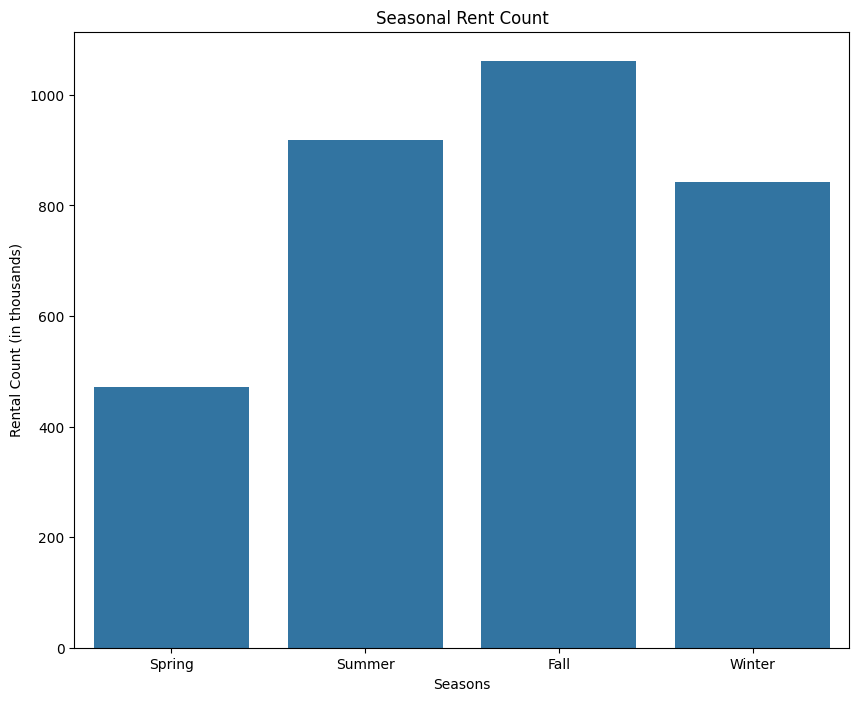

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x="season",
    y="rental_count",
    data=seasonal_rental,
)

plt.title("Seasonal Rent Count")
plt.xlabel("Seasons")
plt.ylabel("Rental Count (in thousands)")
plt.show()

### 2. Daily Analysis
***Business Question: How does days affect the number on bike rent?***

First, we'll visualize the workday vs freeday data

In [20]:
workday_freeday_pie = (
    day_df.groupby(by="workingday")["rental_count"].sum().reset_index()
)

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\1165300356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="workingday")["rental_count"].sum().reset_index()


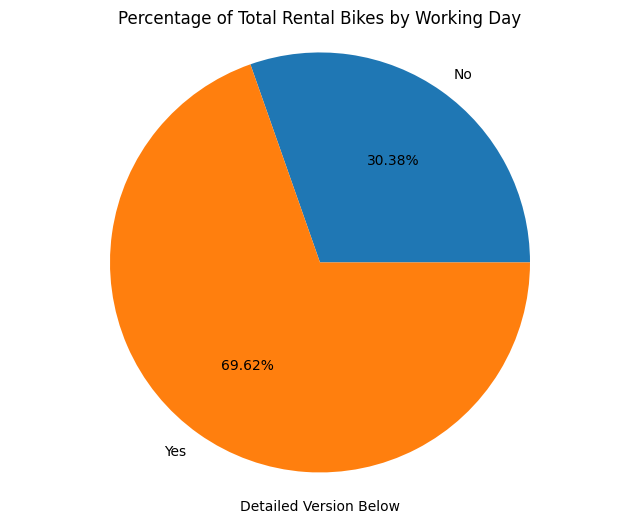

In [21]:
sizes = workday_freeday_pie["rental_count"]
labels = workday_freeday_pie["workingday"]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%")
plt.title("Percentage of Total Rental Bikes by Working Day")
plt.axis("equal")
plt.xlabel("Detailed Version Below")
plt.show()

In [22]:
weekday_pie = day_df.groupby(by="weekday")["rental_count"].sum().reset_index()
weekday_pie

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\3297132922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_pie = day_df.groupby(by="weekday")["rental_count"].sum().reset_index()


,weekday,rental_count
0,Sun,444027
1,Mon,455503
2,Tue,469109
3,Wed,473048
4,Thu,485395
5,Fri,487790
6,Sat,477807


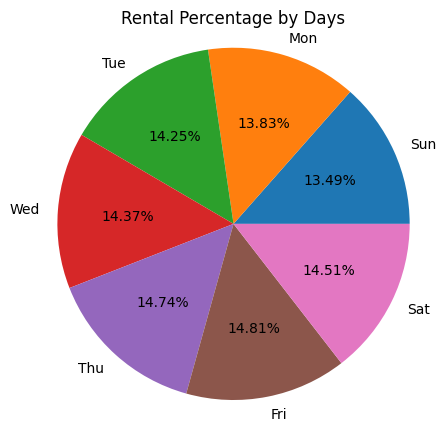

In [23]:
labels = weekday_pie["weekday"]
sizes = weekday_pie["rental_count"]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.2f%%")

plt.title("Rental Percentage by Days")
plt.axis("equal")
plt.show()

### 3. Business Growth Analysis
***Does the business grow or have a stagnant progress?***

To visualize this data, it is better for us to split between the years before showing the whole data.

In [24]:
rent2011_df = day_df[day_df["year"] == 2011]
rent2012_df = day_df[day_df["year"] == 2012]

In [25]:
monthly_2011 = rent2011_df.resample(rule="M", on="date").agg({"rental_count": "sum"})
monthly_2011.index = monthly_2011.index.strftime("%B")
monthly_2011 = monthly_2011.reset_index()
monthly_2011

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\154641611.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_2011 = rent2011_df.resample(rule="M", on="date").agg({"rental_count": "sum"})


,date,rental_count
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821
5,June,143512
6,July,141341
7,August,136691
8,September,127418
9,October,123511


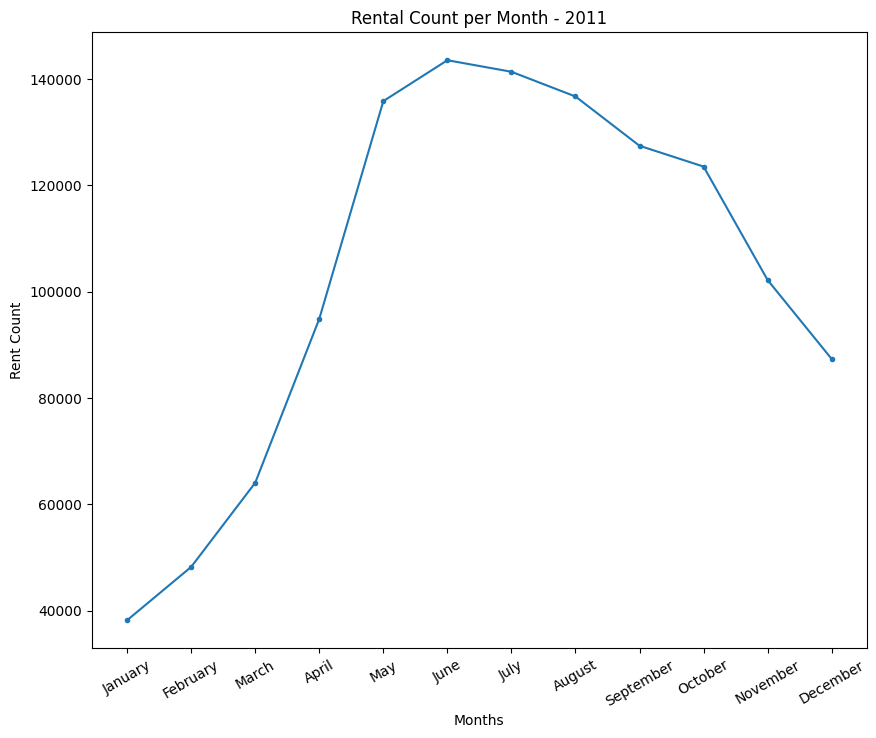

In [26]:
plt.figure(figsize=(10, 8))

plt.plot(
    monthly_2011["date"],
    monthly_2011["rental_count"],
    marker=".",
)
plt.title("Rental Count per Month - 2011")
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.xlabel("Months")
plt.ylabel("Rent Count")
plt.show()

We'll do the same with 2012's data

In [27]:
monthly_2012 = rent2012_df.resample(rule="M", on="date").agg({"rental_count": "sum"})
monthly_2012.index = monthly_2012.index.strftime("%B")
monthly_2012 = monthly_2012.reset_index()
monthly_2012

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\3259323795.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_2012 = rent2012_df.resample(rule="M", on="date").agg({"rental_count": "sum"})


,date,rental_count
0,January,96744
1,February,103137
2,March,164875
3,April,174224
4,May,195865
5,June,202830
6,July,203607
7,August,214503
8,September,218573
9,October,198841


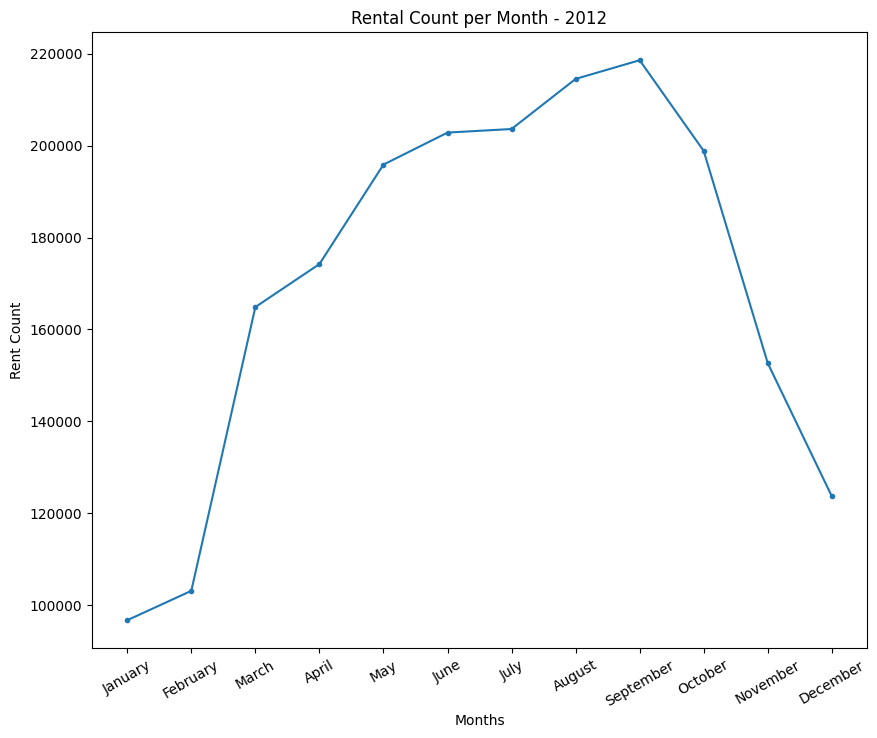

In [28]:
plt.figure(figsize=(10, 8))

plt.plot(
    monthly_2012["date"],
    monthly_2012["rental_count"],
    marker=".",
)
plt.title("Rental Count per Month - 2012")
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.xlabel("Months")
plt.ylabel("Rent Count")
plt.show()

And now we're combining them both

In [29]:
monthly = day_df.resample(rule="M", on="date").agg({"rental_count": "sum"})
monthly.index = monthly.index.strftime("%Y-%m")
monthly = monthly.reset_index()
monthly

C:\Users\maxfr\AppData\Local\Temp\ipykernel_18756\212099978.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = day_df.resample(rule="M", on="date").agg({"rental_count": "sum"})


,date,rental_count
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


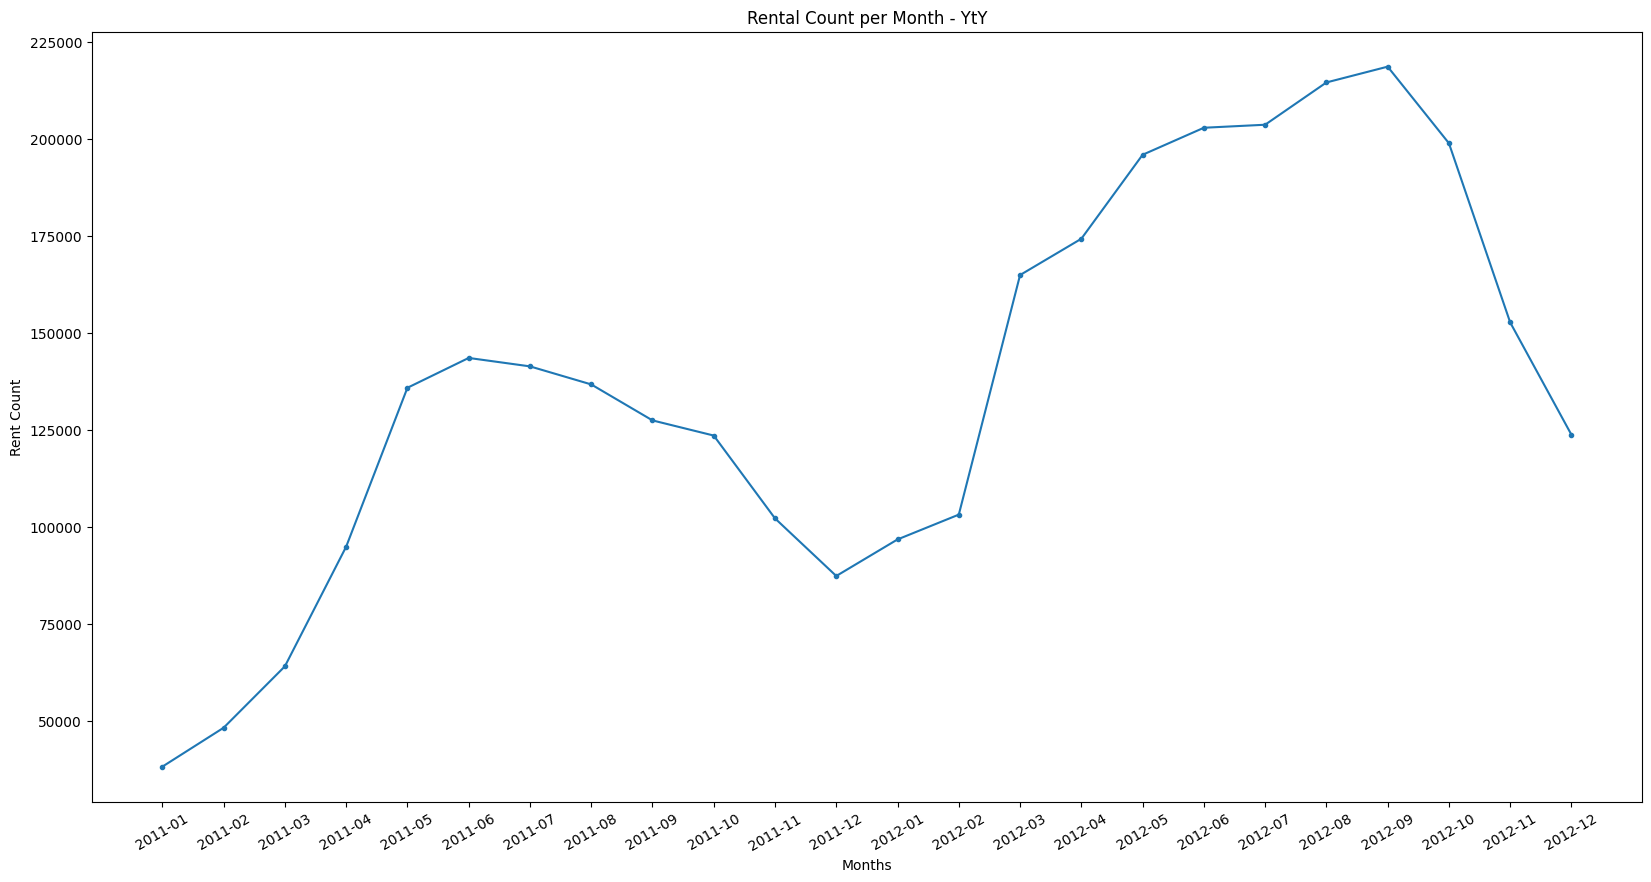

In [30]:
plt.figure(figsize=(20, 10))

plt.plot(
    monthly["date"],
    monthly["rental_count"],
    marker=".",
)
plt.title("Rental Count per Month - YtY")
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.xlabel("Months")
plt.ylabel("Rent Count")
plt.show()

Next, we're going to count the YtY (Year to Year) growth rate

In [31]:
january2011 = monthly["rental_count"].iloc[0]
december2012 = monthly["rental_count"].iloc[-1]
increase_in_percent = ((december2012 - january2011) / january2011) * 100
print(f"Growth: {increase_in_percent}%")

Growth: 223.94930477362593%


## CONCLUSION

### 1. How does season change/transition affect the number on bike rent?

>Based on the analysis above, we can conclude that most people love to rent bikes during Summer and Fall, most likely related to how Summer is perceived to be the best time to exercise and Fall's weather is lovely. This trend happens consistently between 2011 and 2012.

### 2. How does days affect the number on bike rent

>On plain sight, we can easily say that people rent bikes more during working days than freedays. But, if we analyse the data better, we can see that it's actually evenly spread between the 7 days in a week, averaging 470k rents for each days (*as own classes, not progressive*) throughout 2 years. 

### 3. Does the business grow or have a stagnant progress? How big/small?

>From the data above, we can conclude that the business definitely grow, even after some downtrend towards the end of each year, reaching an all-time peak rents on September 2012 with 218k rents.

# Extras

For dashboard purposes, the cell below will be ran once to produce the dataframes we used above into an csv file.

The `day_df` will also be redownloaded with the new headers.

In [32]:
day_df.to_csv("day_modified.csv", index=False)
rent2011_df.to_csv("day_2011.csv", index=False)
rent2012_df.to_csv("day_2012.csv", index=False)